## **First - Data Capstone Project**

* This project will be about **911 calls**. I’m using an **open dataset** from **Montgomery County**(https://www.kaggle.com/datasets/mchirico/montcoalert?utm_source=chatgpt.com), Pennsylvania (USA). The dataset contains emergency calls with details like the reason (medical, fire, traffic), the time and date, and the location.

* Since this data is **publicly available**, I decided to practice my skills with it. My goal here is to work on **data cleaning, exploratory data analysis, and visualizations**. By analyzing this dataset, I want to discover trends over time, understand which types of emergencies are most common, and practice creating plots that tell a story with the data.

In [447]:
# Let's start by importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [448]:
# Read in the csv file as a dataframe called df:
df = pd.read_csv('911.csv')
# Check the head of df:
df.head(11)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [449]:
# Check the info() of the df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [450]:
# What are the top 5 zipcodes:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [451]:
# What are the top 5 townships (twp):
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [452]:
# How many unique title codes are there:
df['title'].nunique()

110

* **unique()[0] →** pega o primeiro valor da lista de valores únicos (ordem pode variar dependendo dos dados). Usar quando quiser trabalhar com valores distintos.

* **iloc[0] →** pega o valor da primeira linha da coluna. Use quando quiser acessar uma linha específica. 

In [453]:
# What is the first unique value:
#df['title'].unique()[0]
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [454]:
# Use .apply() with a custom lambda expression to create a new column called \"Reason\" that contains this string value.
new_col = df['reason'] = df['title'].apply(lambda x : x.split(':')[0])
# where x is title.
new_col.head(11)


0         EMS
1         EMS
2        Fire
3         EMS
4         EMS
5         EMS
6         EMS
7         EMS
8         EMS
9     Traffic
10    Traffic
Name: title, dtype: object

In [455]:
df.head(11)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


In [456]:
# What is the most common Reason:
df['reason'].value_counts()
# df['reason'].value_counts().max()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

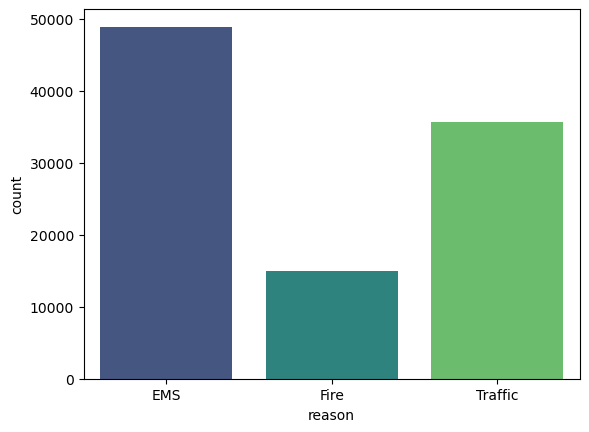

In [457]:
# Now use seaborn to create a countplot of 911 calls by Reason:
# sns.countplot(x='reason', data=df, palette='viridis')
sns.countplot(x='reason', hue='reason', data=df, palette='viridis', legend=False)

* **Converting string →** datetime is crucial because it ensures correct sorting, enables date/time extraction, supports time calculations, and improves visualization in time-series analysis.

In [458]:
# What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [459]:
# to convert the column from strings to DateTime objects:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [461]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [462]:
#df['timeStamp'].dt.year
#df['timeStamp'].dt.month
#df['timeStamp'].dt.hour
df['timeStamp'].diff()

0                   NaT
1       0 days 00:00:00
2       0 days 00:00:00
3       0 days 00:00:01
4       0 days 00:00:00
              ...      
99487   0 days 00:03:58
99488   0 days 00:01:02
99489   0 days 00:04:58
99490   0 days 00:05:01
99491   0 days 00:00:01
Name: timeStamp, Length: 99492, dtype: timedelta64[ns]

In [463]:
# use .apply() to create 3 new columns called Hour, Month, and Day of Week:
df['Hour'] = df['timeStamp'].apply(lambda ts : ts.hour)

In [464]:
df['Month'] = df['timeStamp'].apply(lambda ts : ts.month)

In [465]:
df['Day'] = df['timeStamp'].apply(lambda ts : ts.day)

In [466]:
df['Year'] = df['timeStamp'].apply(lambda ts : ts.year)

In [467]:
df['Day of Week'] = df['timeStamp'].apply(lambda ts : ts.dayofweek)
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,10,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,10,2015,3


In [468]:
# how the Day of Week is an integer 0-6. 
# Use the .map() with this dictionary to map the actual string names to the day of the week:
# df = pd.DataFrame({'Day of Week': [0, 1, 2, 3, 4, 5, 6]})
dmap = {0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'}


In [469]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,2015,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,2015,Wednesday


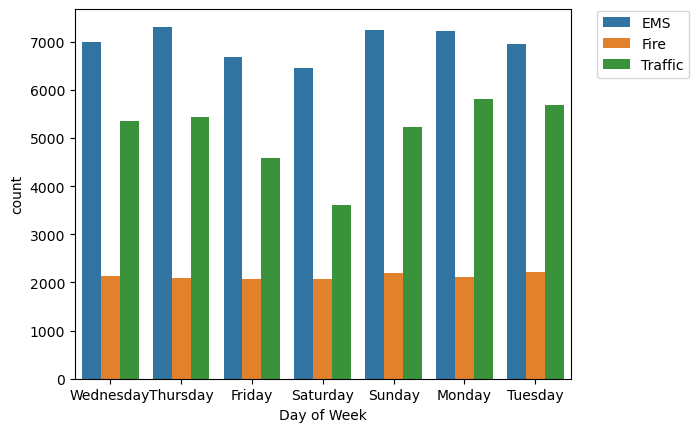

In [470]:
# Now use seaborn to create a countplot of the Day of Week column:
sns.countplot(x='Day of Week', hue='reason', data=df, legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

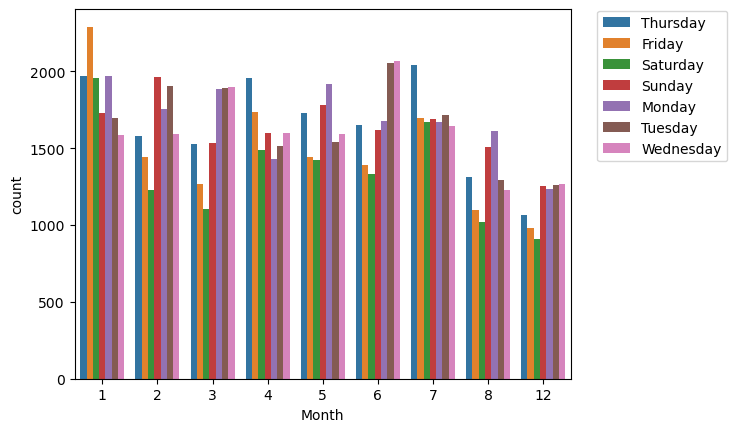

In [471]:
#Now do the same for Month:
sns.countplot(x='Month', hue='Day of Week', data=df, legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

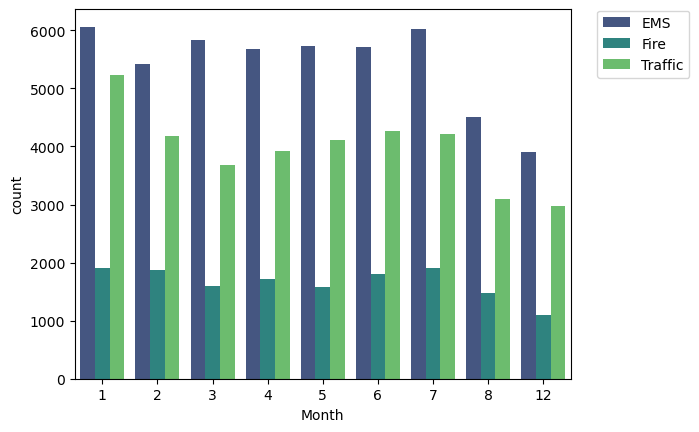

In [472]:
sns.countplot(x='Month', hue='reason', data=df, legend=True, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

In [473]:
# You should have noticed it was missing some Months
# Now create a gropub''y object called byMonth
byMonth = df.groupby('Month').count()
byMonth.head(13)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Year,Day of Week
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


<Axes: xlabel='Month'>

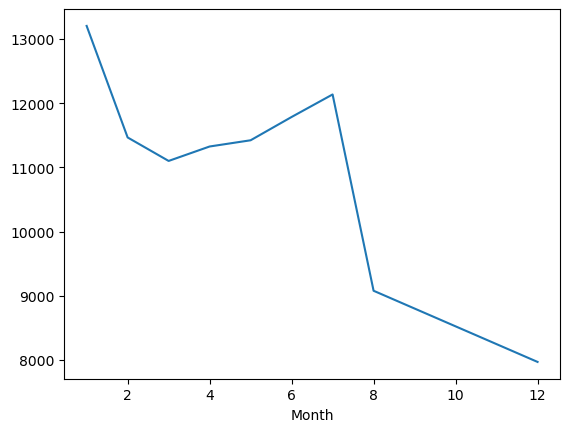

In [474]:
byMonth['lat'].plot()

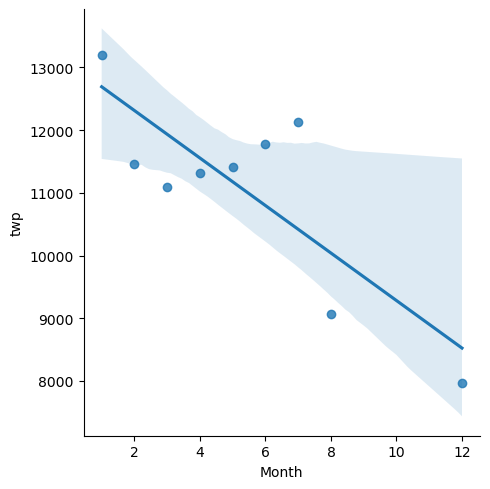

In [477]:
# Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [482]:
# Create a new column called 'Date' that contains the date from the timeStamp column.
df['Date'] = df['timeStamp'].apply(lambda ts : ts.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Year,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,2015,Wednesday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,2015,Wednesday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,10,2015,Wednesday,2015-12-10


In [491]:
# Now groupby this Date column with the count() aggregate and create a plot of counts
byDate = df.groupby('Date').count()
byDate.head(6)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day,Year,Day of Week
Date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421,421,421


In [ ]:
# In summary:
#byDate = df.groupby('Date').count()['twp'].plot()
#plt.tight_layout()

<Axes: xlabel='Date'>

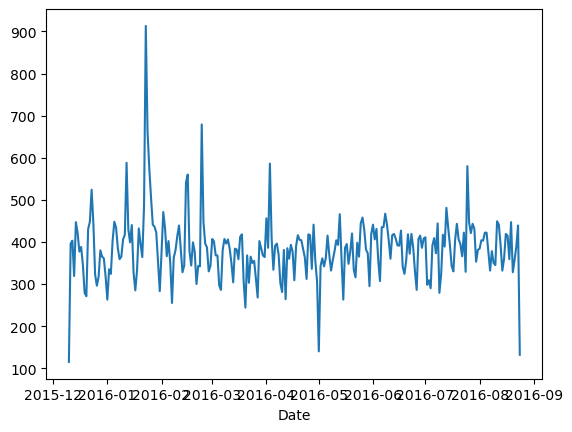

In [486]:
byDate['lat'].plot()

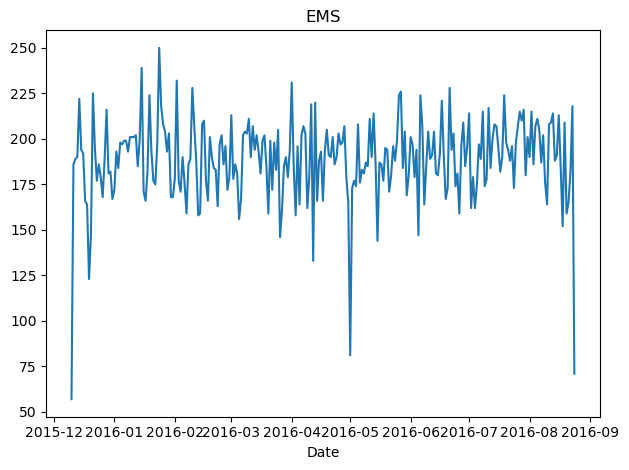

In [495]:
df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Text(0.5, 1.0, 'Fire')

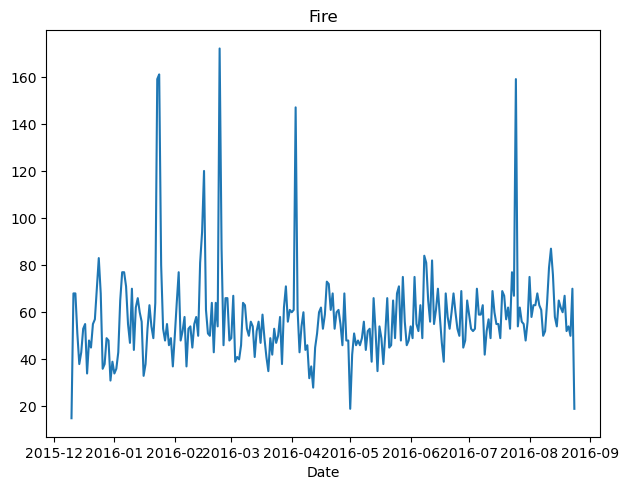

In [500]:
df[df['reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

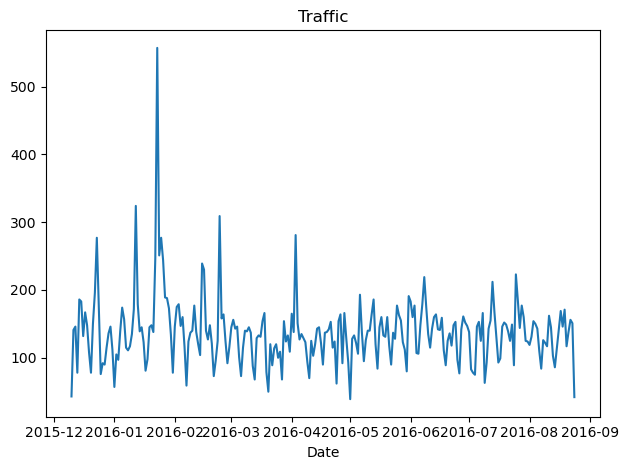

In [503]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

In [508]:
dayhour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Monday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Saturday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Sunday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Thursday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tuesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Wednesday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


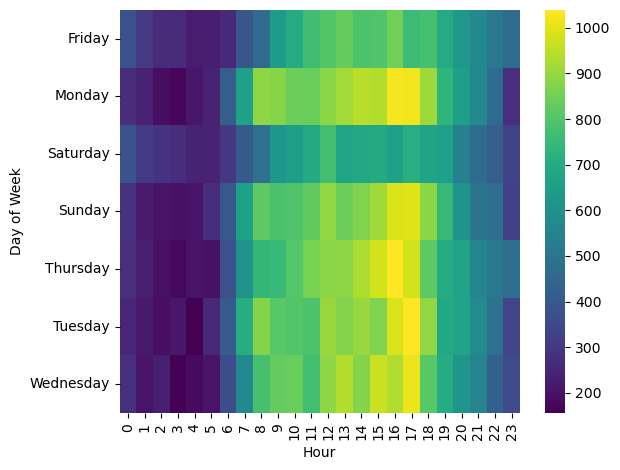

In [ ]:
# mostra a intensidade (chamadas por dia × hora).
sns.heatmap(dayhour, cmap='viridis')
plt.tight_layout()

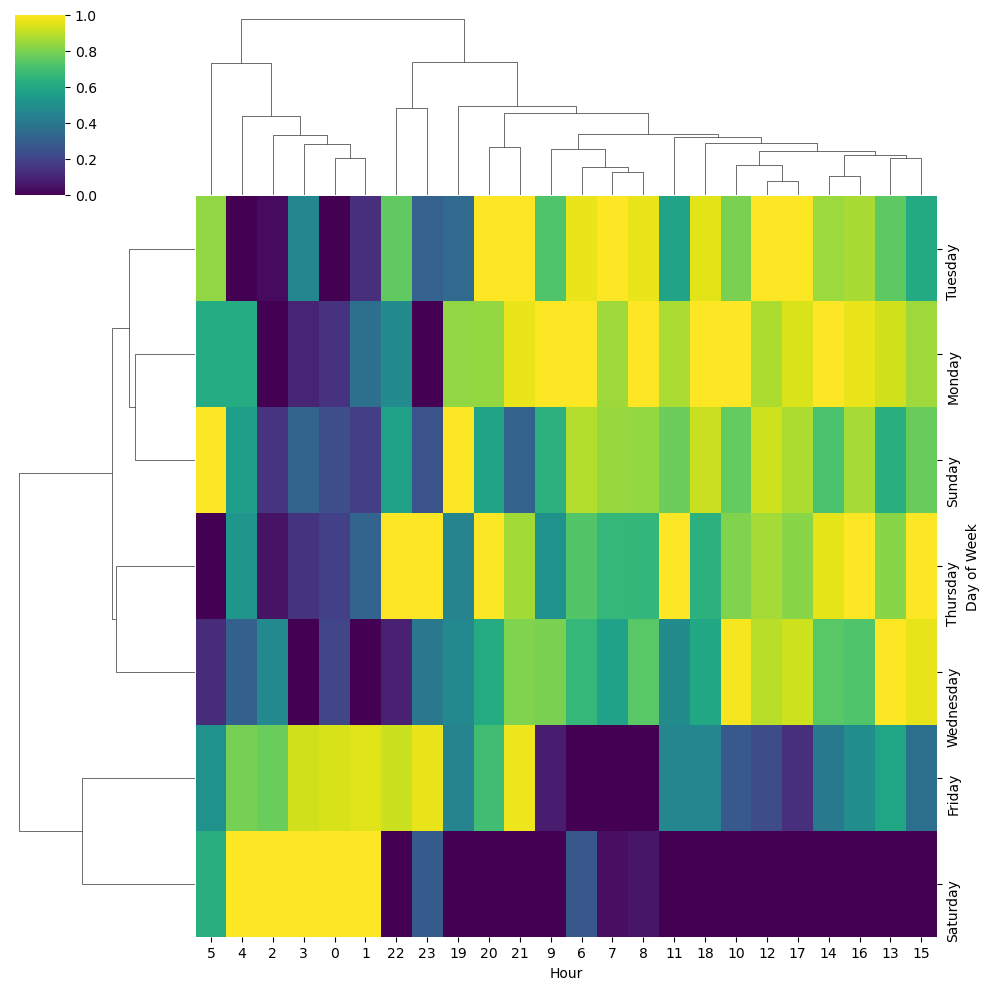

In [527]:
# reorganiza as linhas/colunas automaticamente, para colocar juntos os dias e horas que têm padrões semelhantes.
sns.clustermap(dayhour, cmap= 'viridis', standard_scale=1)

In [530]:
# Now for month:
daymonth = df.groupby(by=['Day of Week', 'Month']).count()['reason'].unstack()

<Axes: xlabel='Month', ylabel='Day of Week'>

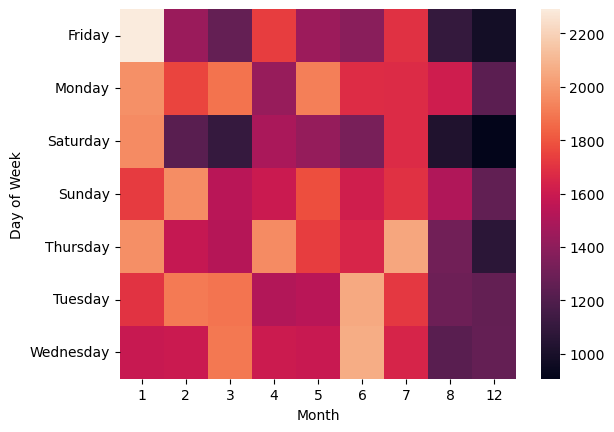

In [532]:
sns.heatmap(daymonth)

<Figure size 1200x600 with 0 Axes>

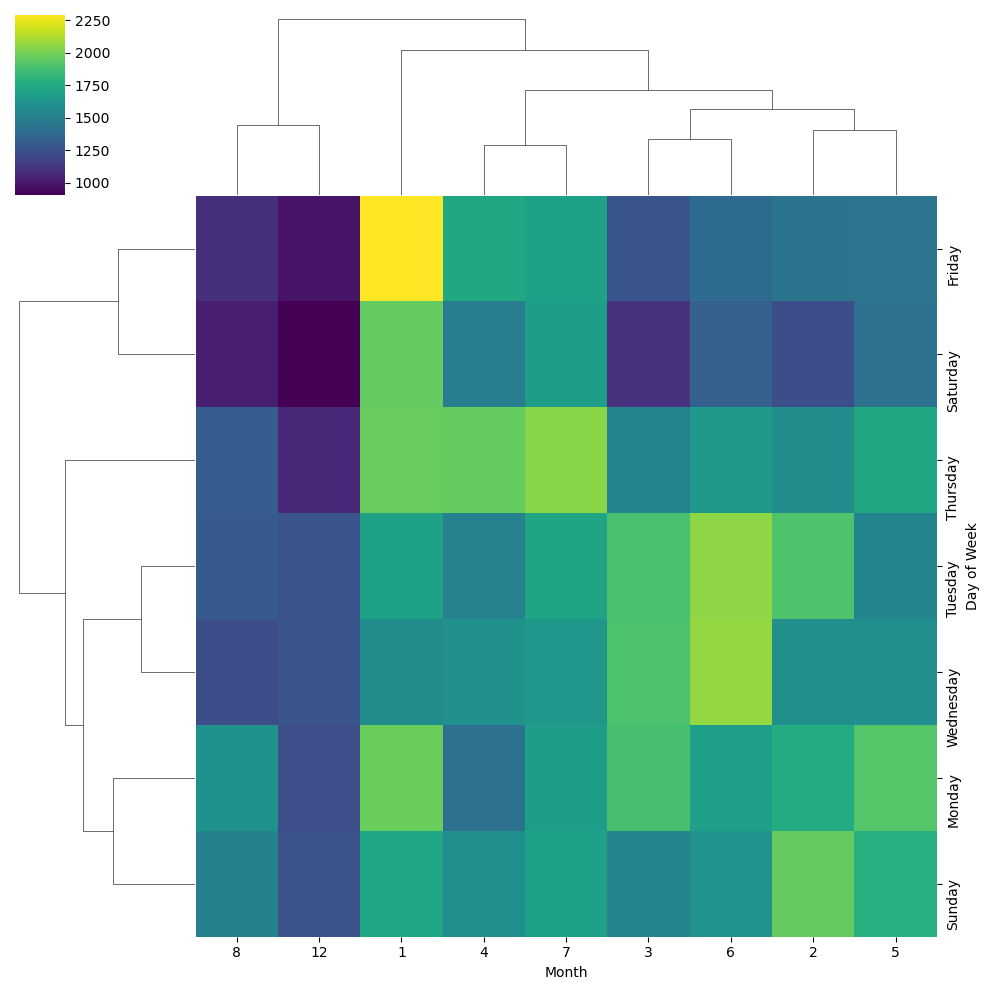

In [538]:
plt.figure(figsize=(12,6))
sns.clustermap(daymonth, cmap='viridis')

## See you later!